# Chapter 8: Dimensionality Reduction

**Tujuan:** Memahami teknik mengurangi dimensi data—mengatasi “curse of dimensionality”—dengan PCA, Kernel PCA, dan manifold learning (LLE).

---

## 1. Curse of Dimensionality

- Data berdimensi tinggi menjadi **sangat jarang** → jarak antar titik kehilangan makna.  
- Model cenderung **overfit** atau **berkinerja buruk**.

## 2. Pendekatan Umum

1. **Projection**: cari transformasi linier (contoh: PCA).  
2. **Manifold learning**: anggap data terletak pada manifold berdimensi lebih rendah (contoh: LLE).

---

## 3. Principal Component Analysis (PCA)

- Mencari **principal directions** (eigenvectors) dari kovarians data.  
- Proyeksikan ke **k** komponen utama → memaksimalkan varians.  
- **Explained variance ratio**: seberapa banyak varians dipertahankan per komponen.

---

## 4. Kernel PCA

- Perluas PCA ke ruang berdimensi tinggi via **kernel trick** (RBF, polynomial).  
- Dapat memisahkan data non‑linier.

---

## 5. Locally Linear Embedding (LLE)

- Manifold learning: jaga **lokal neighborhood** setiap titik.  
- Cocok untuk data yang terletak di manifold melengkung (S‑curve, Swiss roll).

---

In [1]:
# Setup umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, make_circles, make_s_curve
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

## A. PCA pada Dataset Digit

Proyeksikan digit berdimensi-64 → 2D untuk visualisasi.

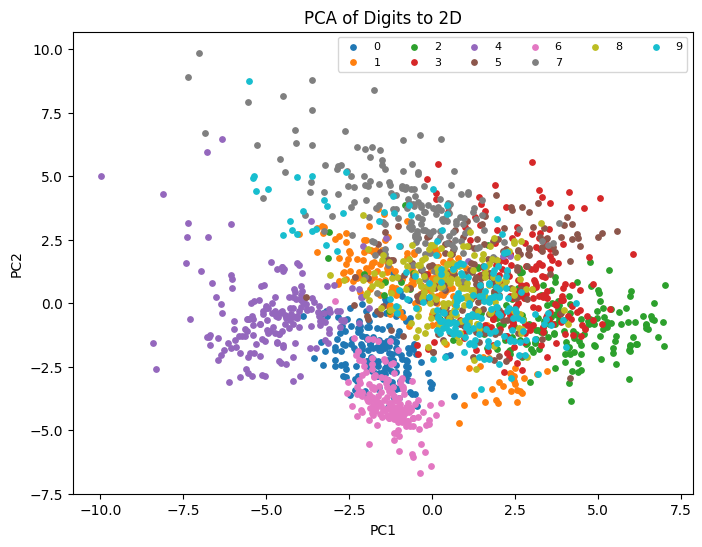

In [2]:
# Load & scale
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)

# PCA → 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil
plt.figure(figsize=(8,6))
for digit in np.unique(y):
    mask = (y == digit)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=str(digit), s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(ncol=6, fontsize=8)
plt.title("PCA of Digits to 2D")
plt.show()

### Explained Variance Ratio

Berapa proporsi varians yang ditangkap tiap komponen?

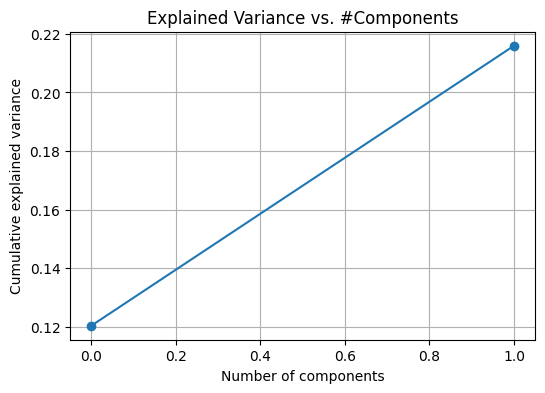

In [3]:
# Plot explained variance ratio
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.title("Explained Variance vs. #Components")
plt.show()

## B. Kernel PCA (RBF) pada Data Non‑Linier

Gunakan dataset `make_circles` untuk lihat efek kernel RBF.

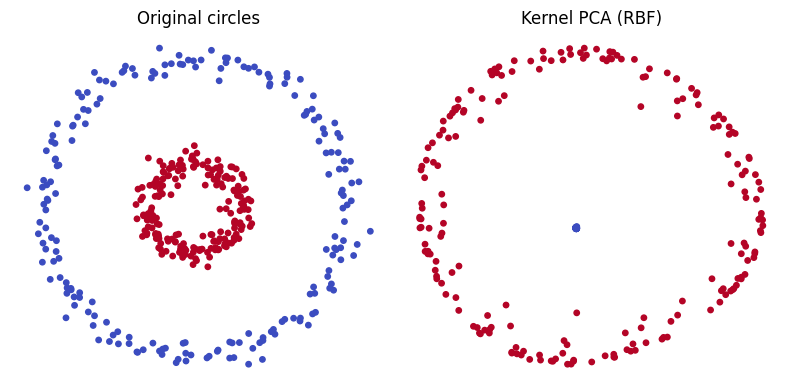

In [4]:
# Buat data
Xc, yc = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

# Kernel PCA RBF → 2D
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(Xc)

# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(Xc[:,0], Xc[:,1], c=yc, cmap='coolwarm', s=15)
plt.title("Original circles")
plt.axis('off')

plt.subplot(1,2,2)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=yc, cmap='coolwarm', s=15)
plt.title("Kernel PCA (RBF)")
plt.axis('off')

plt.tight_layout()
plt.show()

## C. Manifold Learning: Locally Linear Embedding (LLE)

Coba `make_s_curve` dan LLE (2D embedding).

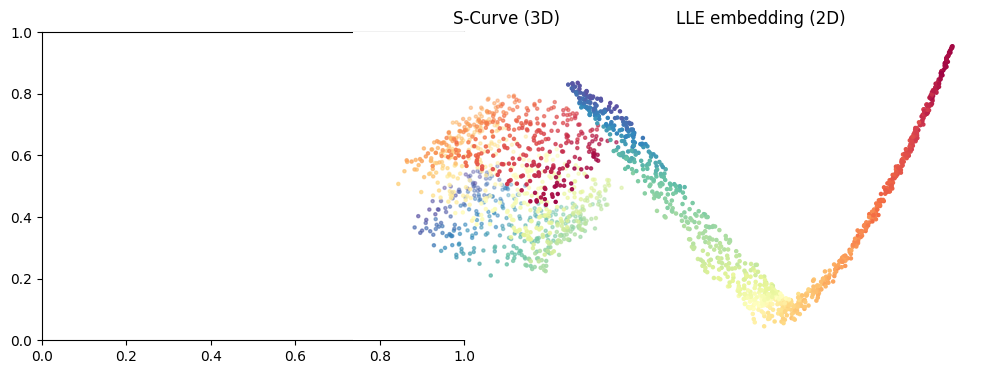

In [13]:
# Buat S‑curve
X_s, t = make_s_curve(n_samples=1000, noise=0.1, random_state=42)

# LLE → 2D
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=42)
X_lle = lle.fit_transform(X_s)

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = plt.axes(projection='3d')
ax.scatter(X_s[:,0], X_s[:,1], X_s[:,2], c=t, cmap='Spectral', s=5)
ax.set_title("S‑Curve (3D)")
ax.set_axis_off()

plt.subplot(1,2,2)
plt.scatter(X_lle[:,0], X_lle[:,1], c=t, cmap='Spectral', s=5)
plt.title("LLE embedding (2D)")
plt.axis('off')

plt.show()

---

## Ringkasan Chapter 8

- **PCA**: proyeksi linier, pilih komponen berdasar varians.  
- **Kernel PCA**: memetakan non‑linier via kernel trick.  
- **LLE**: manifold learning—pertahankan neighborhood lokal.  
- Dimensi rendah mempermudah visualisasi dan mempercepat learning.